In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('New Dataframe.csv')

# Separate features and target variable
X = data.drop(columns=['Target'])  # Replace 'Target' with the actual target column name
y = data['Target']  # Replace 'Target' with the actual target column name

# Split the data into train (65%), validation (20%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 * 0.35 ≈ 0.15

# Initialize ElasticNet model
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Adjust alpha and l1_ratio if needed

# Fit model on training data
model.fit(X_train, y_train)

# Predict and evaluate on validation set
y_val_pred = model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)
medae_val = median_absolute_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Predict and evaluate on test set
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
medae_test = median_absolute_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Additional statistics for validation predictions
val_stats = {
    "Validation Std Dev": np.std(y_val_pred),
    "Validation Avg": np.mean(y_val_pred),
    "Validation Min": np.min(y_val_pred),
    "Validation Max": np.max(y_val_pred),
}

# Additional statistics for test predictions
test_stats = {
    "Test Std Dev": np.std(y_test_pred),
    "Test Avg": np.mean(y_test_pred),
    "Test Min": np.min(y_test_pred),
    "Test Max": np.max(y_test_pred),
}

# Display the evaluation metrics rounded to 2 decimal places
print("Validation Metrics:")
print(f"R²: {r2_val:.2f}")
print(f"Median Absolute Error: {medae_val:.2f}")
print(f"Mean Absolute Error: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"Std Dev: {val_stats['Validation Std Dev']:.2f}")
print(f"Avg: {val_stats['Validation Avg']:.2f}")
print(f"Min: {val_stats['Validation Min']:.2f}")
print(f"Max: {val_stats['Validation Max']:.2f}\n")

print("Test Metrics:")
print(f"R²: {r2_test:.2f}")
print(f"Median Absolute Error: {medae_test:.2f}")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"Std Dev: {test_stats['Test Std Dev']:.2f}")
print(f"Avg: {test_stats['Test Avg']:.2f}")
print(f"Min: {test_stats['Test Min']:.2f}")
print(f"Max: {test_stats['Test Max']:.2f}")

Validation Metrics:
R²: 0.59
Median Absolute Error: 35.72
Mean Absolute Error: 79.34
RMSE: 135.43
Std Dev: 182.40
Avg: 188.12
Min: -5.00
Max: 492.77

Test Metrics:
R²: 0.62
Median Absolute Error: 33.07
Mean Absolute Error: 76.47
RMSE: 134.72
Std Dev: 193.80
Avg: 226.78
Min: -24.40
Max: 479.55


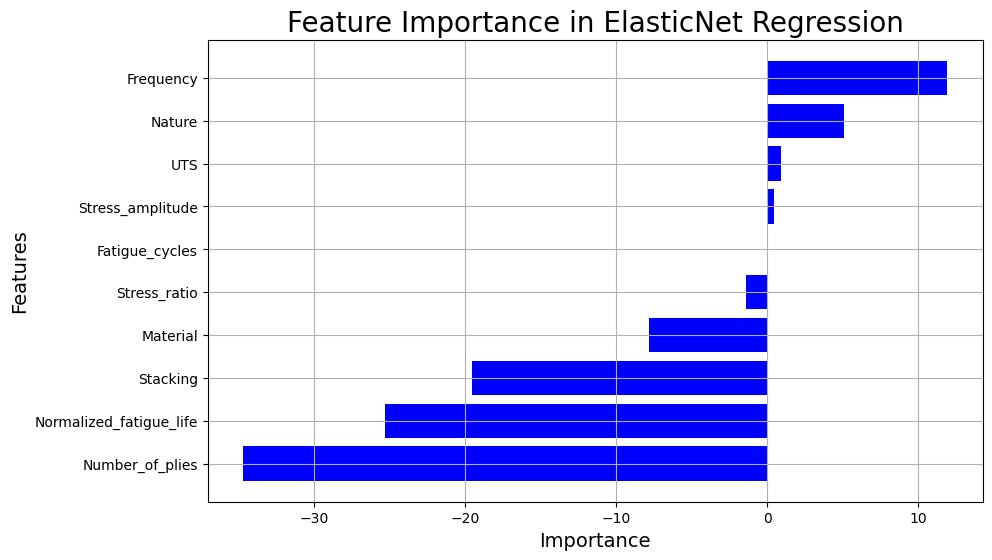

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance (absolute values of coefficients)
feature_importance = model.coef_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.title('Feature Importance in ElasticNet Regression', fontsize = 20)
plt.gca().invert_yaxis()
plt.grid(True)

# Save the plot as an image
plt.savefig('ER.tiff', bbox_inches='tight', pad_inches=0.1)
plt.show()

# GridSearchCV

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Load the dataset
data = pd.read_csv('New Dataframe.csv')

# Separate features and target variable
X = data.drop(columns=['Target'])  # Replace 'Target' with the actual target column name
y = data['Target']  # Replace 'Target' with the actual target column name

# Split the data into train (65%), validation (20%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 * 0.35 ≈ 0.15

# Define the ElasticNet model
elasticnet = ElasticNet(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.001, 0.5, 1.0, 1.5, 2.0],
    'l1_ratio': [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9],
    'max_iter': [1000, 2000, 3000, 5000]
}

# Suppress only ConvergenceWarning
simplefilter("ignore", ConvergenceWarning)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elasticnet, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best cross-validation R² score
best_params = grid_search.best_params_
best_cv_r2 = grid_search.best_score_

# Re-train the model using the best parameters
Elasticnet_GS = grid_search.best_estimator_

# Predict and evaluate on validation set
y_val_pred = Elasticnet_GS.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)
medae_val = median_absolute_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Predict and evaluate on test set
y_test_pred = Elasticnet_GS.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
medae_test = median_absolute_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Additional statistics for validation predictions
val_stats = {
    "Validation Std Dev": np.std(y_val_pred),
    "Validation Avg": np.mean(y_val_pred),
    "Validation Min": np.min(y_val_pred),
    "Validation Max": np.max(y_val_pred),
}

# Additional statistics for test predictions
test_stats = {
    "Test Std Dev": np.std(y_test_pred),
    "Test Avg": np.mean(y_test_pred),
    "Test Min": np.min(y_test_pred),
    "Test Max": np.max(y_test_pred),
}

# Display the best parameters and cross-validation R²
print("Best Parameters:", best_params)
print(f"Best CV R²: {best_cv_r2:.2f}\n")

# Display validation metrics
print("Validation Metrics:")
print(f"R²: {r2_val:.2f}")
print(f"Median Absolute Error: {medae_val:.2f}")
print(f"Mean Absolute Error: {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"Std Dev: {val_stats['Validation Std Dev']:.2f}")
print(f"Avg: {val_stats['Validation Avg']:.2f}")
print(f"Min: {val_stats['Validation Min']:.2f}")
print(f"Max: {val_stats['Validation Max']:.2f}\n")

# Display test metrics
print("Test Metrics:")
print(f"R²: {r2_test:.2f}")
print(f"Median Absolute Error: {medae_test:.2f}")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"Std Dev: {test_stats['Test Std Dev']:.2f}")
print(f"Avg: {test_stats['Test Avg']:.2f}")
print(f"Min: {test_stats['Test Min']:.2f}")
print(f"Max: {test_stats['Test Max']:.2f}")

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.9, 'max_iter': 5000}
Best CV R²: 0.88

Validation Metrics:
R²: 0.79
Median Absolute Error: 26.28
Mean Absolute Error: 50.09
RMSE: 97.13
Std Dev: 210.70
Avg: 190.05
Min: -26.28
Max: 594.78

Test Metrics:
R²: 0.80
Median Absolute Error: 24.36
Mean Absolute Error: 51.53
RMSE: 99.05
Std Dev: 198.93
Avg: 223.92
Min: -26.77
Max: 537.90


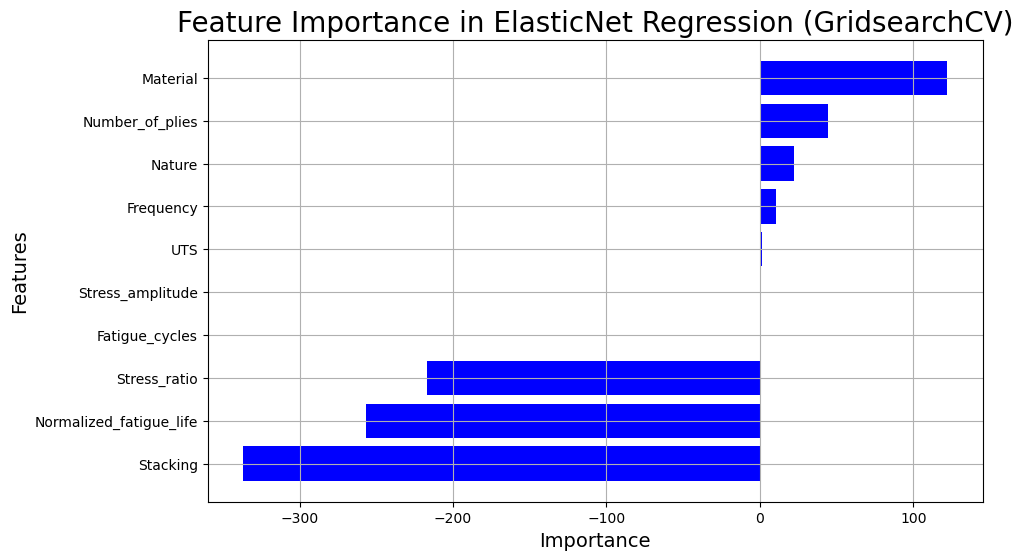

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance (absolute values of coefficients)
feature_importance = Elasticnet_GS.coef_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plotting feature importance as a bar graph in ascending order
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance in ElasticNet Regression (GridsearchCV)', fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('ER_gridserach.tiff', bbox_inches='tight', pad_inches=0.1)

plt.show()

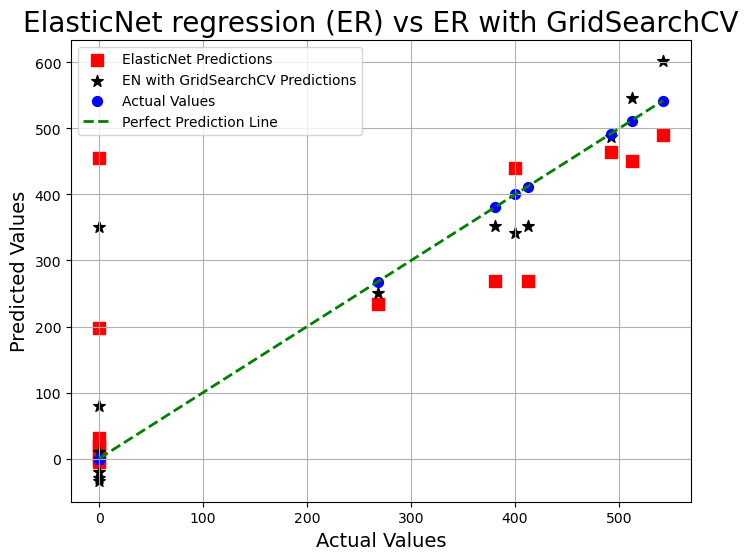

In [ ]:
# Generate Scatter Plot for ElasticNet vs GridSearchCV ElasticNet
plt.figure(figsize=(8, 6))

# Plot predictions from ElasticNet
plt.scatter(y_test, y_test_pred_elastic_net, marker='s', color='red', s=75, label="ElasticNet Predictions")

# Plot predictions from GridSearchCV ElasticNet
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label="EN with GridSearchCV Predictions")

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Reference line (Perfect prediction line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Adding labels and legend
plt.title("ElasticNet regression (ER) vs ER with GridSearchCV", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('ER vs ER with gridserach.tiff')

# Show plot
plt.show()